In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
titanic = sns.load_dataset('titanic')

In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [4]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### Summary Statistics

In [5]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
titanic.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
sibsp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


### Basic Information

In [8]:
titanic['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

<AxesSubplot:xlabel='survived', ylabel='count'>

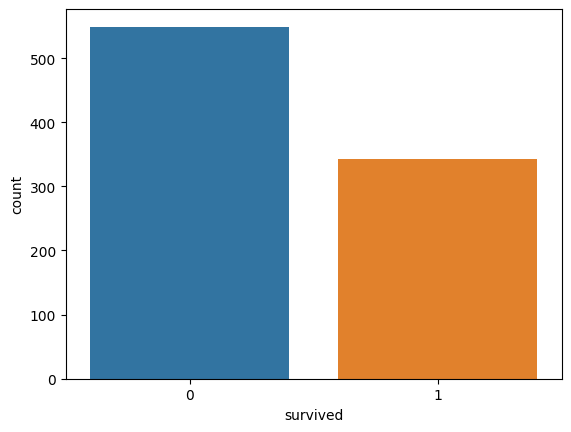

In [9]:
sns.countplot(data=titanic, x='survived')

In [10]:
titanic['pclass'].value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

In [11]:
titanic['class'].value_counts()

Third     491
First     216
Second    184
Name: class, dtype: int64

In [12]:
p_class = titanic[['pclass', 'class']]
p_class.head()

,pclass,class
0,3,Third
1,1,First
2,3,Third
3,1,First
4,3,Third


In [13]:
# how many genders are present
titanic['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

<AxesSubplot:xlabel='sex', ylabel='count'>

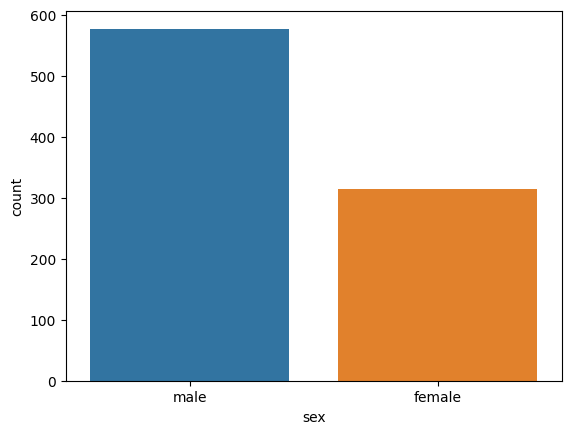

In [14]:
sns.countplot(data=titanic, x='sex')

In [15]:
# passengers less than 20 years
less_than_20 = titanic[titanic['age'] < 20]
less_than_20.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
14,0,3,female,14.0,0,0,7.8542,S,Third,child,False,NaN,Southampton,no,True
16,0,3,male,2.0,4,1,29.1250,Q,Third,child,False,NaN,Queenstown,no,False


In [16]:
len(less_than_20)

164

<AxesSubplot:ylabel='who'>

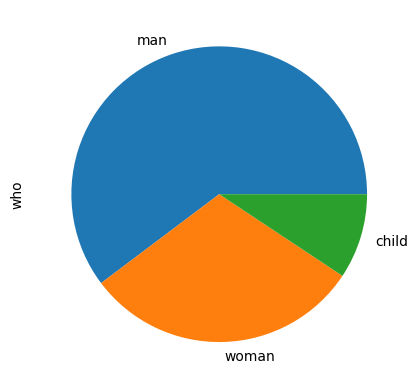

In [17]:
# categories of the passengers in the column who
titanic.who.value_counts().plot(kind='pie')

In [19]:
# unique cities in the column
titanic['embark_town'].nunique()

3

<AxesSubplot:>

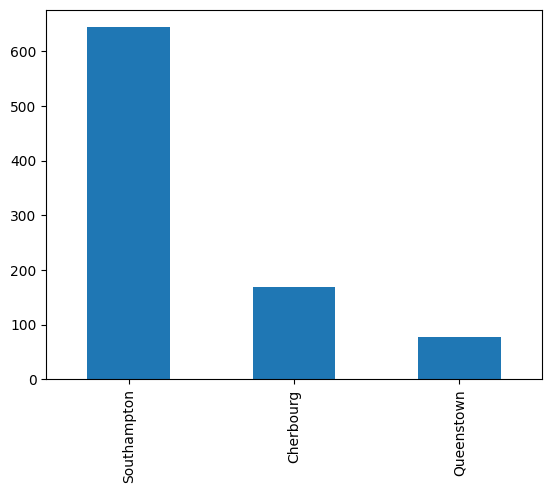

In [20]:
titanic['embark_town'].value_counts().plot(kind='bar')

### Missing Data

In [21]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

There are missing data in age and deck. Heatmaps can be used to show missing values

<AxesSubplot:>

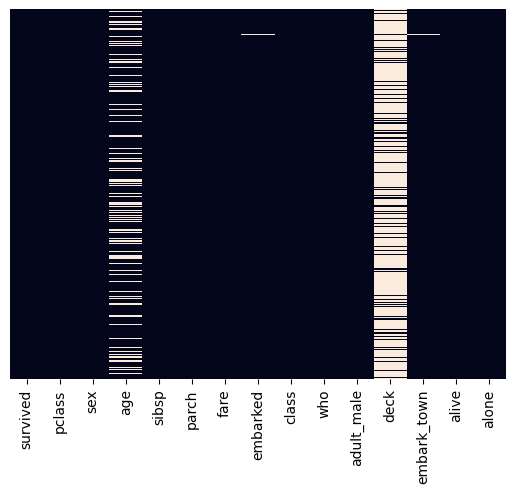

In [22]:
sns.heatmap(titanic.isnull(), yticklabels=False, cbar=False)

### More Analysis

<AxesSubplot:xlabel='survived', ylabel='count'>

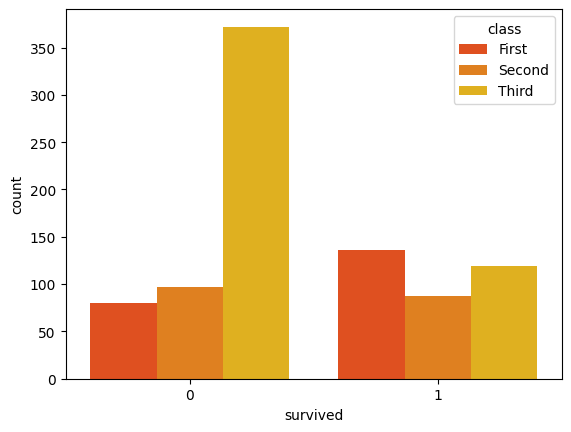

In [23]:
sns.countplot(data=titanic, x='survived', palette='autumn', hue='class')

<AxesSubplot:xlabel='survived', ylabel='count'>

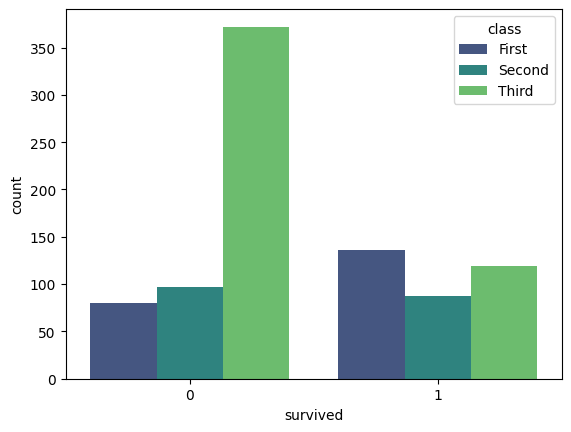

In [24]:
sns.countplot(data=titanic, x='survived', palette='viridis', hue='class')

<AxesSubplot:ylabel='Frequency'>

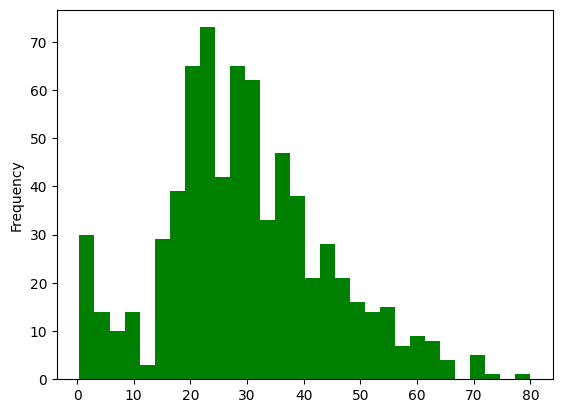

In [25]:
titanic.age.plot(kind='hist', bins=30, color='green')

<AxesSubplot:xlabel='age', ylabel='fare'>

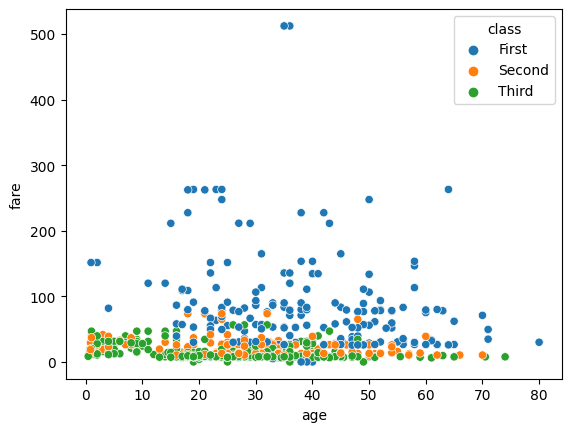

In [26]:
sns.scatterplot(data=titanic, x='age', y='fare', hue='class')

<AxesSubplot:xlabel='age', ylabel='fare'>

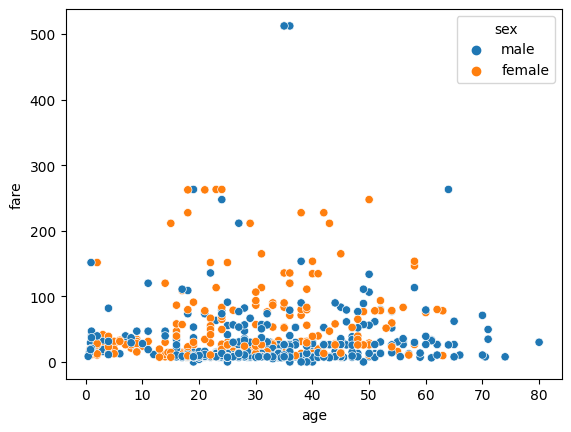

In [27]:
sns.scatterplot(data=titanic, x='age', y='fare', hue='sex')

### Checking Correlating Features
Can help you see the similarities between features

In [28]:
correlation = titanic.corr()
correlation

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


In [29]:
correlation['survived']

survived      1.000000
pclass       -0.338481
age          -0.077221
sibsp        -0.035322
parch         0.081629
fare          0.257307
adult_male   -0.557080
alone        -0.203367
Name: survived, dtype: float64

<AxesSubplot:>

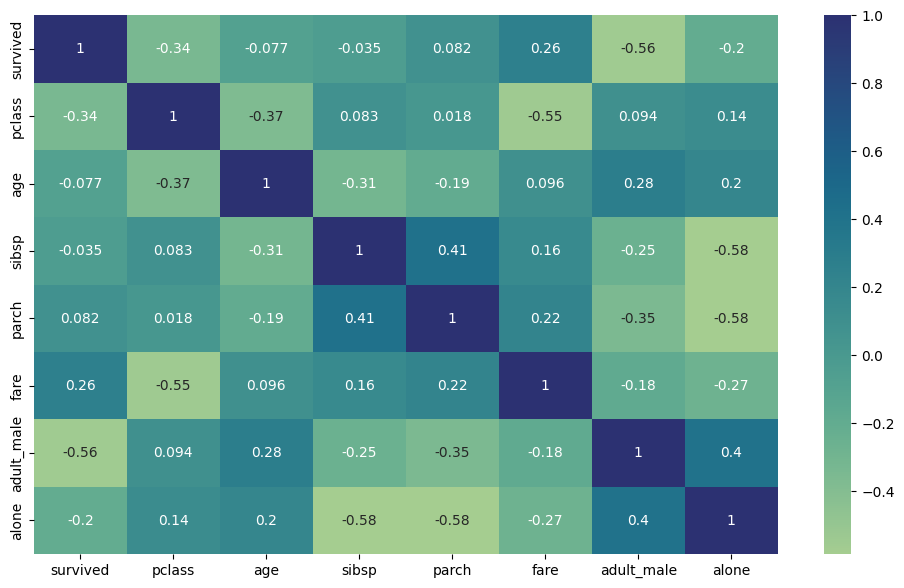

In [31]:
# check how the features correlate with the label survived

plt.figure(figsize=(12,7))
sns.heatmap(correlation, annot=True, cmap='crest')